In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [110]:
h = 0.01

In [111]:
@np.vectorize
def w(x):
    if 0 < x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    return 0

In [112]:
@np.vectorize
def phi(x, j):
    return w(x/h - j)

In [113]:
def xs():
    return np.array([(i+1)*h for i in range(-1, int(1/h)-1)])

In [114]:
@np.vectorize
def u(x):
    return (x**(3-1) - 1)/(3-1)

In [115]:
us = u(np.linspace(0,1,100))

In [116]:
a = np.array([-0.5000490304169367,-0.4999827163408525,-0.4998274531476333,-0.4995743731664336,-0.4992222194490350,-0.4987705753822971,-0.4982192525924118,-0.4975681501640258,-0.4968172078507800,-0.4959663868623140,-0.4950156607877371,-0.4939650108537337,-0.4928144232513037,-0.4915638875359207,-0.4902133956227905,-0.4887629411302392,-0.4872125189360330,-0.4855621248689245,-0.4838117554888795,-0.4819614079271027,-0.4800110797673799,-0.4779607689565829,-0.4758104737361586,-0.4735601925889746,-0.4712099241975779,-0.4687596674110538,-0.4662094212184497,-0.4635591847272653,-0.4608089571458981,-0.4579587377692035,-0.4550085259665318,-0.4519583211717514,-0.4488081228748755,-0.4455579306149952,-0.4422077439742808,-0.4387575625728666,-0.4352073860644656,-0.4315572141325943,-0.4278070464873100,-0.4239568828623769,-0.4200067230127987,-0.4159565667126597,-0.4118064137532315,-0.4075562639413062,-0.4032061170977246,-0.3987559730560732,-0.3942058316615270,-0.3895556927698195,-0.3848055562463229,-0.3799554219652256,-0.3750052898087940,-0.3699551596667098,-0.3648050314354722,-0.3595549050178590,-0.3542047803224388,-0.3487546572631294,-0.3432045357587966,-0.3375544157328894,-0.3318042971131082,-0.3259541798311015,-0.3200040638221890,-0.3139539490251083,-0.3078038353817823,-0.3015537228371066,-0.2952036113387530,-0.2887535008369896,-0.2822033912845145,-0.2755532826363025,-0.2688031748494634,-0.2619530678831114,-0.2550029616982436,-0.2479528562576277,-0.2408027515256977,-0.2335526474684570,-0.2262025440533885,-0.2187524412493709,-0.2112023390266002,-0.2035522373565175,-0.1958021362117404,-0.1879520355660001,-0.1800019353940820,-0.1719518356717697,-0.1638017363757937,-0.1555516374837823,-0.1472015389742158,-0.1387514408263839,-0.1302013430203454,-0.1215512455368901,-0.1128011483575033,-0.1039510514643324,-0.09500095484015513,-0.08595085846834986,-0.07680076233286753,-0.06755066641820515,-0.05820057070938079,-0.04875047519190990,-0.03920037985178301,-0.02955028467544456,-0.01980018964977289,-0.009950094762061278])

In [117]:
ys = []
for ai, i, x in zip(a, range(-1, len(a)), xs()):
    ys.append(ai * phi(x, i))

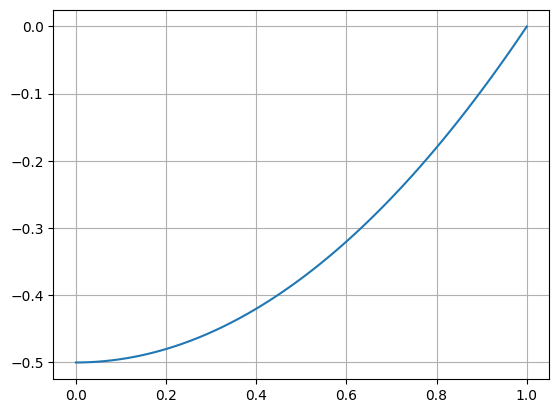

In [118]:
plt.plot(list(xs()) + [1], ys + [0])
plt.grid(True)
plt.show()


In [119]:
points = [(float(x),float(y)) for x,y in zip(list(xs()) + [1], ys + [0])]
print(', '.join(str(point) for point in points))

(0.0, -0.5000490304169367), (0.01, -0.4999827163408525), (0.02, -0.4998274531476333), (0.03, -0.4995743731664336), (0.04, -0.499222219449035), (0.05, -0.4987705753822971), (0.06, -0.4982192525924118), (0.07, -0.49756815016402534), (0.08, -0.49681720785078), (0.09, -0.495966386862314), (0.1, -0.4950156607877371), (0.11, -0.4939650108537337), (0.12, -0.4928144232513037), (0.13, -0.4915638875359207), (0.14, -0.4902133956227896), (0.15, -0.4887629411302392), (0.16, -0.487212518936033), (0.17, -0.4855621248689245), (0.18, -0.4838117554888795), (0.19, -0.4819614079271027), (0.2, -0.4800110797673799), (0.21, -0.4779607689565829), (0.22, -0.4758104737361586), (0.23, -0.4735601925889746), (0.24, -0.4712099241975779), (0.25, -0.4687596674110538), (0.26, -0.4662094212184497), (0.27, -0.4635591847272653), (0.28, -0.4608089571458965), (0.29, -0.4579587377692019), (0.3, -0.4550085259665318), (0.31, -0.4519583211717514), (0.32, -0.4488081228748755), (0.33, -0.4455579306149952), (0.34, -0.442207743974

In [120]:
@np.vectorize
def approx(x):
    return sum(ai * phi(x,i) for ai,i in zip(a, range(-1, len(a))))

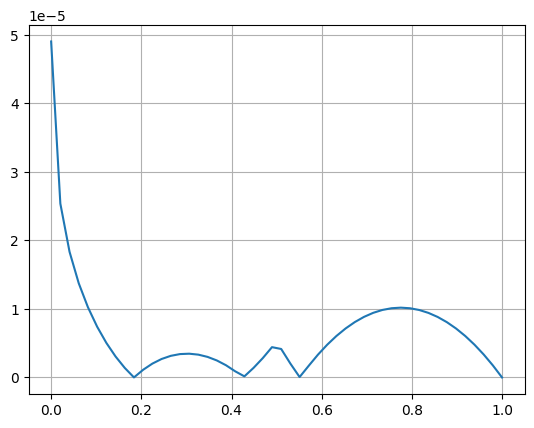

In [125]:
ts = np.linspace(0,1,50)
plt.plot(ts, np.abs(approx(ts) - u(ts)))
plt.grid(True)
plt.show()

In [126]:
points = [(float(x),float(y)) for x,y in zip(ts, np.abs(approx(ts) - u(ts)))]
print(', '.join(str(point) for point in points))

(0.0, 4.903041693671284e-05), (0.02040816326530612, 2.536991641399755e-05), (0.04081632653061224, 1.8336801354545962e-05), (0.061224489795918366, 1.374483983140884e-05), (0.08163265306122448, 1.0243324549796817e-05), (0.1020408163265306, 7.406532151199574e-06), (0.12244897959183673, 5.045908261114285e-06), (0.14285714285714285, 3.061686143224218e-06), (0.16326530612244897, 1.3948424831822237e-06), (0.18367346938775508, 7.654857414607363e-09), (0.2040816326530612, 1.1253948780098888e-06), (0.22448979591836732, 2.0223390868601143e-06), (0.24489795918367346, 2.6963692494330616e-06), (0.26530612244897955, 3.1574111916676806e-06), (0.2857142857142857, 3.4131101723233748e-06), (0.3061224489795918, 3.4694721717243304e-06), (0.32653061224489793, 3.331295675257362e-06), (0.3469387755102041, 3.0024708487785823e-06), (0.36734693877551017, 2.4861920196461718e-06), (0.3877551020408163, 1.7851118676026623e-06), (0.4081632653061224, 9.014554530062391e-07), (0.42857142857142855, 1.6289403020897097e-07

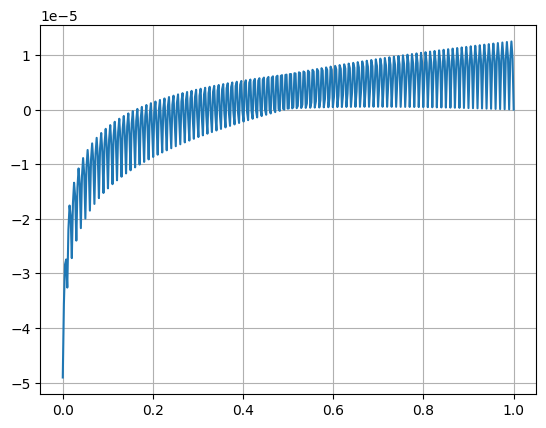

In [131]:
ts = np.linspace(0,1,400)
plt.plot(ts, approx(ts) - u(ts))
plt.grid(True)
plt.show()